In [1]:
#We have to implement KNN model to classify animals into categories.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_csv("Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

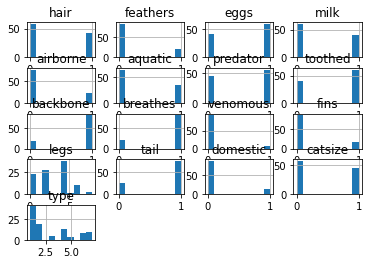

In [6]:
data.hist()

In [8]:
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [9]:
import seaborn as sns

C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


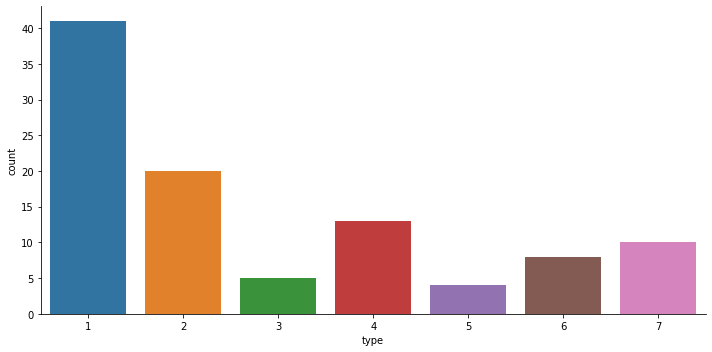

In [10]:
sns.factorplot('type', data=data, kind="count",size = 5,aspect = 2)


In [11]:
#From the above graph we observe that most of the animals in the zoo are of type 1.

In [12]:
df=pd.DataFrame(data)

In [13]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# KNN

In [56]:
num_folds=10
kfold=KFold(n_splits=4)

In [57]:
model1=KNeighborsClassifier(n_neighbors=12)
result1=cross_val_score(model1,X,Y,cv=kfold)

In [58]:
print(result1.mean())

0.771923076923077


# GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
filename = 'Zoo.csv'
names = [
    'animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'
]
dataframe =pd.read_csv(filename, names=names)
array = dataframe.values
X = array[1:, 1:17]
Y = array[1:, 17]

In [62]:
X

array([['1', '0', '0', ..., '0', '0', '1'],
       ['1', '0', '0', ..., '1', '0', '1'],
       ['0', '0', '1', ..., '1', '0', '0'],
       ...,
       ['1', '0', '0', ..., '1', '0', '1'],
       ['0', '0', '1', ..., '0', '0', '0'],
       ['0', '1', '1', ..., '1', '0', '0']], dtype=object)

In [63]:
Y

array(['1', '1', '4', '1', '1', '1', '1', '4', '4', '1', '1', '2', '4',
       '7', '7', '7', '2', '1', '4', '1', '2', '2', '1', '2', '6', '5',
       '5', '1', '1', '1', '6', '1', '1', '2', '4', '1', '1', '2', '4',
       '6', '6', '2', '6', '2', '1', '1', '7', '1', '1', '1', '1', '6',
       '5', '7', '1', '1', '2', '2', '2', '2', '4', '4', '3', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '7', '4', '1', '1', '3', '7',
       '2', '2', '3', '7', '4', '2', '1', '7', '4', '2', '6', '5', '3',
       '3', '4', '1', '1', '2', '1', '6', '1', '7', '2'], dtype=object)

In [64]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [65]:
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}

In [67]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\Avanti\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [68]:
grid.cv_results_['mean_fit_time']

array([1.61595345e-03, 3.12652588e-03, 0.00000000e+00, 3.12871933e-03,
       0.00000000e+00, 3.06320190e-04, 3.12485695e-03, 0.00000000e+00,
       8.02993774e-05, 0.00000000e+00, 7.85665512e-03, 1.60322189e-03,
       0.00000000e+00, 0.00000000e+00, 1.00088120e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.33228302e-04, 0.00000000e+00,
       0.00000000e+00, 1.60126686e-03, 1.97887421e-03, 3.12638283e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.60336494e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.37178802e-04,
       1.64489746e-03, 5.92660904e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22694778e-03])

In [69]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# Visualizing the results.

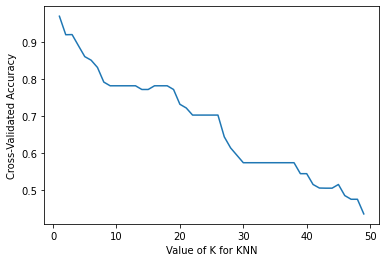

In [70]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 50
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()